## Importing necessary libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Loading Data

In [4]:
folder_path = 'Dataset/'  # Specify the folder containing your CSV files

print("List of CSV files:")
filenames = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
for file in filenames:
    print(file)


List of CSV files:
February_2019.csv
December_2019.csv
September_2019.csv
November_2019.csv
June_2019.csv
July_2019.csv
January_2019.csv
April_2019.csv
October_2019.csv
March_2019.csv
May_2019.csv
August_2019.csv


In [5]:
# Step 2: Concatenate all CSV files into a single DataFrame
all_data = pd.DataFrame()  # Create an empty DataFrame

for file in filenames:
    file_path = os.path.join(folder_path, file)  # Get the full path of the file
    df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)  # Append to the main DataFrame



In [6]:
# Step 3: Show the combined DataFrame
print("\nCombined DataFrame:")
print(all_data)


Combined DataFrame:
       Order ID                     Product Quantity Ordered Price Each  \
0        150502                      iPhone                1        700   
1        150503       AA Batteries (4-pack)                1       3.84   
2        150504      27in 4K Gaming Monitor                1     389.99   
3        150505    Lightning Charging Cable                1      14.95   
4        150506       AA Batteries (4-pack)                2       3.84   
...         ...                         ...              ...        ...   
186845   248146  Bose SoundSport Headphones                1      99.99   
186846   248147      AAA Batteries (4-pack)                3       2.99   
186847   248148       AA Batteries (4-pack)                1       3.84   
186848   248149        USB-C Charging Cable                1      11.95   
186849   248150       AA Batteries (4-pack)                1       3.84   

            Order Date                         Purchase Address  
0       02/1

In [7]:
data = all_data
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [8]:
data.shape

(186850, 6)

# Data Processing

In [10]:
# do we have missing values?
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
data.dropna(axis= 0, inplace = True)

In [12]:
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

**Now our Data Clean from Nan Values**

In [14]:
# do we have duplicates?
data.duplicated().sum()

618

In [15]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

**All columns are in Object format let's convert the comlumns that need to convert**

In [17]:
print(data['Quantity Ordered'].unique())


['1' '2' '4' '3' '5' '7' 'Quantity Ordered' '6' '8' '9']


**"We cannot convert `Quantity Ordered` to an integer because it contains string values such as `Quantity Ordered`."**

---
we can convert this string values to avg of the Quantity Ordered

In [19]:
filter = data[data['Quantity Ordered'] != 'Quantity Ordered']

In [20]:
filter['Quantity Ordered'] = filter['Quantity Ordered'].astype(int)

/var/folders/yj/p3l4j_1s5p51_d1jl_60qy5c0000gn/T/ipykernel_28643/1813150858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['Quantity Ordered'] = filter['Quantity Ordered'].astype(int)


In [21]:
avg_quantity_ordered = round(filter['Quantity Ordered'].mean())

In [22]:
data['Quantity Ordered'] = data['Quantity Ordered'].replace('Quantity Ordered' ,avg_quantity_ordered )

In [23]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)

**we finished from Quantity Ordered and it's clean now let's discove the other columns**

*   we notice that Price column is also object so let's convert it










In [25]:
len(data[data['Price Each']=='Price Each'])

355

we have 355 row that have a string value in Price Column , let's convert them to the avg of price.  
note : it's not the best decision but we suppose the avg price is good for this case

In [27]:
filter2 = data[data['Price Each'] != 'Price Each']
filter2['Price Each'] = filter2['Price Each'].astype(float);
avg_price = round(filter2['Price Each'].mean())
data['Price Each'] = data['Price Each'].replace('Price Each' ,avg_price )
data['Price Each'] = data['Price Each'].astype(float)

/var/folders/yj/p3l4j_1s5p51_d1jl_60qy5c0000gn/T/ipykernel_28643/2410401160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['Price Each'] = filter2['Price Each'].astype(float);


**Convert Order Date datatype to datetime**

In [29]:
# data = data[data['Order Date'] != 'Order Date']

In [30]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

In [31]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  int64         
 3   Price Each        186305 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


"Now our column data types have been successfully converted."






## Feature Engineering

we have 'Quantity Ordered' & Price for each unit so let's calculate the column total

In [35]:
data['Total'] = data['Quantity Ordered'] * data['Price Each']


also we can drive other columns from the order date like : order day and Month

In [37]:
data['day'] = data['Order Date'].dt.day_name()
data['month'] = data['Order Date'].dt.month_name()
data['hour'] = data['Order Date'].dt.hour

we can benefit from Purchase Address by splitting it and get the cities names

In [39]:
data[['Street Address', 'City', 'State ZIP']] = data['Purchase Address'].str.split(', ', expand=True)

In [40]:
data[['State' , 'Zip']] = data['State ZIP'].str.split(' ',expand = True)

**now we don't need theses columns : Purchase Address	& State ZIP**

In [42]:
data.drop(['Purchase Address' , 'State ZIP'] , axis = 1 ,inplace = True)

In [43]:
data = data.sort_values(by='Order Date' )
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Total,day,month,hour,Street Address,City,State,Zip
100837,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,11.99,Tuesday,January,3.0,9 Lake St,New York City,NY,10001
101647,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,11.95,Tuesday,January,3.0,760 Church St,San Francisco,CA,94016
103000,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,150.00,Tuesday,January,4.0,735 5th St,New York City,NY,10001
103654,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,2.99,Tuesday,January,5.0,75 Jackson St,Dallas,TX,75001
103007,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,23.90,Tuesday,January,6.0,943 2nd St,Atlanta,GA,30301


**Our Cities**

In [45]:
data['City'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin', None], dtype=object)

In [162]:

            # Save the DataFrame to a CSV file
data.to_csv('combined_dataset.csv', index=False)

# If you want to specify a different path, use the full path:
# data.to_csv('/path/to/save/combined_dataset.csv', index=False)

# EDA

# Sales Analysis:



## best month for sales ?

In [49]:
monthly_sales  = data.groupby(['month'] , as_index = False)['Total'].sum()
monthly_sales

,month,Total
0,April,3390670.24
1,August,2244467.88
2,December,4613443.34
3,February,2202022.42
4,January,1822256.73
5,July,2647775.76
6,June,2577802.26
7,March,2807100.38
8,May,3152606.75
9,November,3199603.20


*Sorting monthly_sales by Month*

In [51]:
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
monthly_sales.sort_values('month' , key = lambda x : x.apply(lambda y : month_dict[y]) , inplace = True)

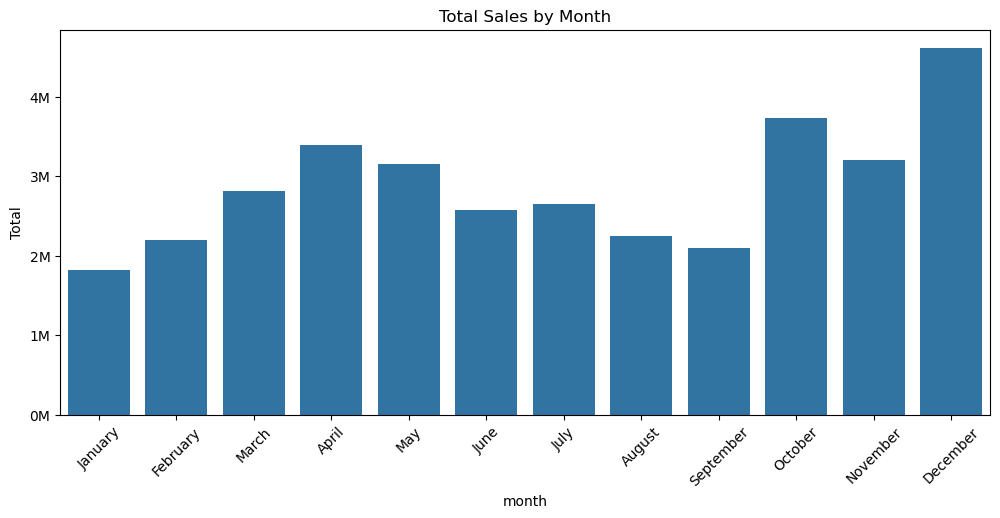

In [52]:
import matplotlib.ticker as mtick
plt.figure(figsize=(12 , 5))
ax = sns.barplot(data = monthly_sales , x = 'month' , y = 'Total')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M'))
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.show()


**month (December) is the highest sales in 2019 with approximately $4,810,000.**


---



 ## What day of the week has the highest sales?


In [55]:
day_data = data.groupby(['month' , 'day'],as_index = False).agg({'Total' : 'sum',
                                     'Order ID':'count'
                                     })

In [56]:
day_dict = {
    'Saturday': 1, 'Sunday': 2, 'Monday': 3, 'Thursday': 4, 'Wednesday': 5, 'Tuesday': 6,
    'Friday': 7
}

day_data['month'] = pd.Categorical(day_data['month'], categories=month_dict, ordered=True)
day_data['day'] = pd.Categorical(day_data['day'], categories=day_dict, ordered=True)
day_data.sort_values(by=['month', 'day'], inplace=True)

In [57]:
day_data_order = day_data.pivot_table(index = 'month' , values = 'Order ID',columns='day' )

/var/folders/yj/p3l4j_1s5p51_d1jl_60qy5c0000gn/T/ipykernel_28643/3061078581.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  day_data_order = day_data.pivot_table(index = 'month' , values = 'Order ID',columns='day' )


<Axes: xlabel='month', ylabel='Count of Orders'>

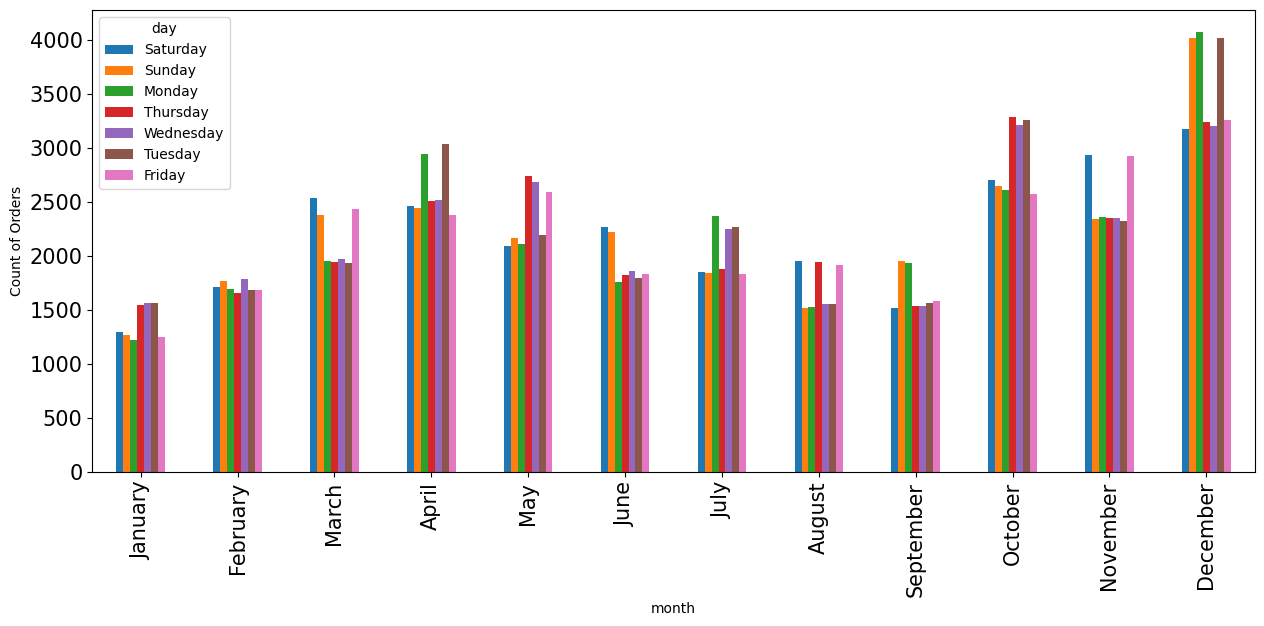

In [58]:
day_data_order.plot(kind = 'bar',figsize = (15 , 6) , fontsize = 15,ylabel = "Count of Orders")

## Timline of day of the week VS Revenue ?

In [60]:
day_data_Total = day_data.pivot_table(index = 'month' , values = 'Total',columns='day' )

/var/folders/yj/p3l4j_1s5p51_d1jl_60qy5c0000gn/T/ipykernel_28643/652927038.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  day_data_Total = day_data.pivot_table(index = 'month' , values = 'Total',columns='day' )


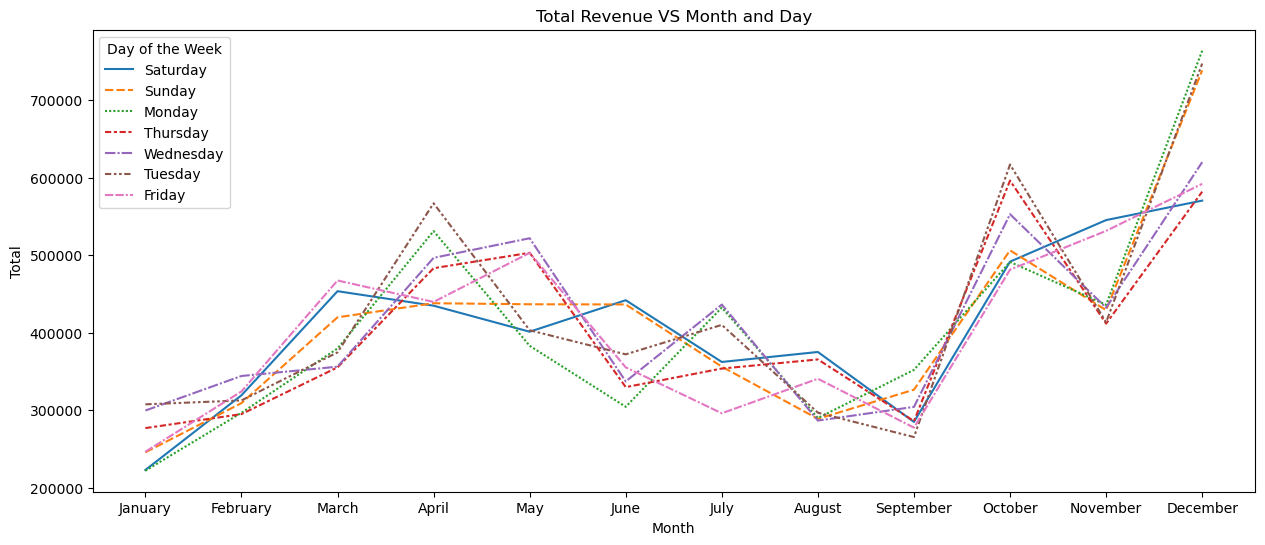

In [61]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=day_data_Total)
plt.title('Total Revenue VS Month and Day')
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend(title='Day of the Week', loc='upper left')
plt.show()

## Sales Per Hour ?

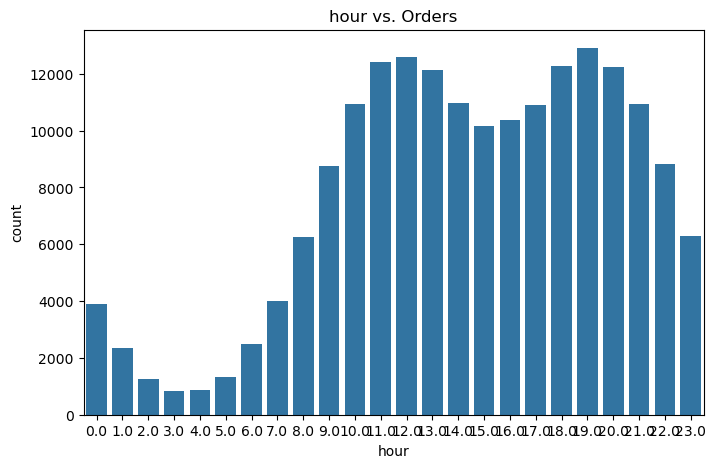

In [63]:
plt.figure(figsize=(8,5))
plt.title('hour vs. Orders')
sns.countplot(x='hour', data=data);

# Product Analysis:


## What product sold the most?

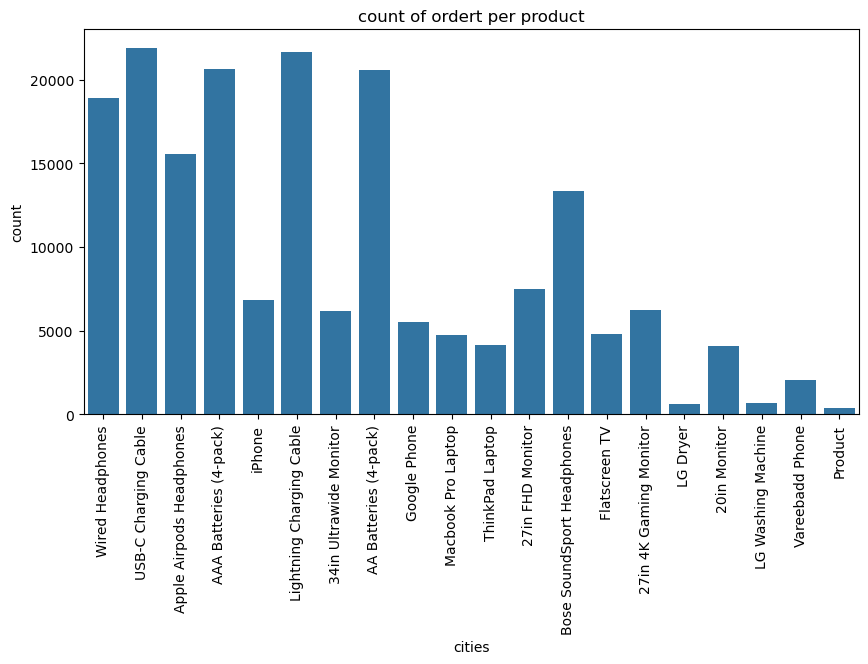

In [66]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Product' , data = data)
plt.xticks(rotation=90)
plt.xlabel('cities')
plt.title('count of ordert per product')
plt.show()

## Top Products for each City

In [68]:
Cities_Products = data.groupby(['City' , 'Product'] , as_index=False).agg({'Quantity Ordered' : 'sum' ,
                                            'Total':'sum'
                                            })
Cities_Products.rename(columns = {'Quantity Ordered':'orders_count'},inplace = True)

In [69]:
def get_top_products(group):
    return group.nlargest(5, 'orders_count')

Cities_Products = Cities_Products.groupby(['City'] , group_keys = False).apply(get_top_products)

/var/folders/yj/p3l4j_1s5p51_d1jl_60qy5c0000gn/T/ipykernel_28643/1572348687.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Cities_Products = Cities_Products.groupby(['City'] , group_keys = False).apply(get_top_products)


In [70]:
x = Cities_Products.pivot_table(index = 'City' , values ='orders_count',columns = 'Product' )

Text(0.5, 1.0, 'Top 5 Products for each City')

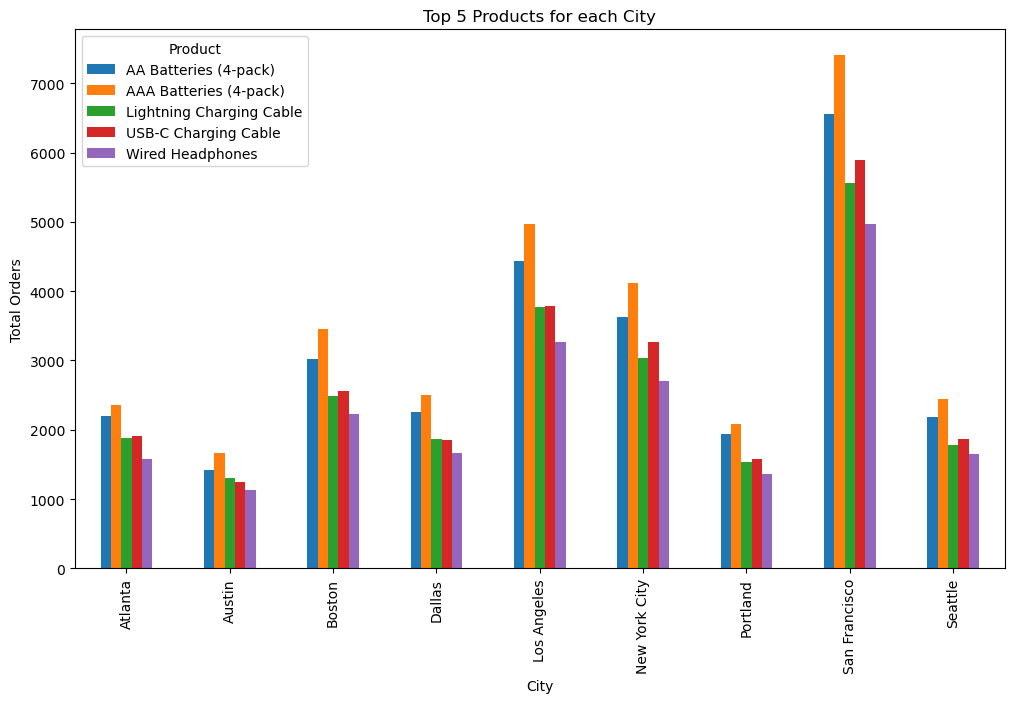

In [71]:
x.plot(kind = 'bar' , figsize=(12,7))
plt.ylabel('Total Orders')
plt.title("Top 5 Products for each City")

## Top 5 Product With Highest Revenue for each City

In [73]:
def get_top_products(group):
    return group.nlargest(5, 'Total')
Cities_Products = Cities_Products.groupby(['City'] , group_keys = False).apply(get_top_products)

/var/folders/yj/p3l4j_1s5p51_d1jl_60qy5c0000gn/T/ipykernel_28643/3874726740.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Cities_Products = Cities_Products.groupby(['City'] , group_keys = False).apply(get_top_products)


Text(0.5, 1.0, 'Top 5 Products VS Revenue')

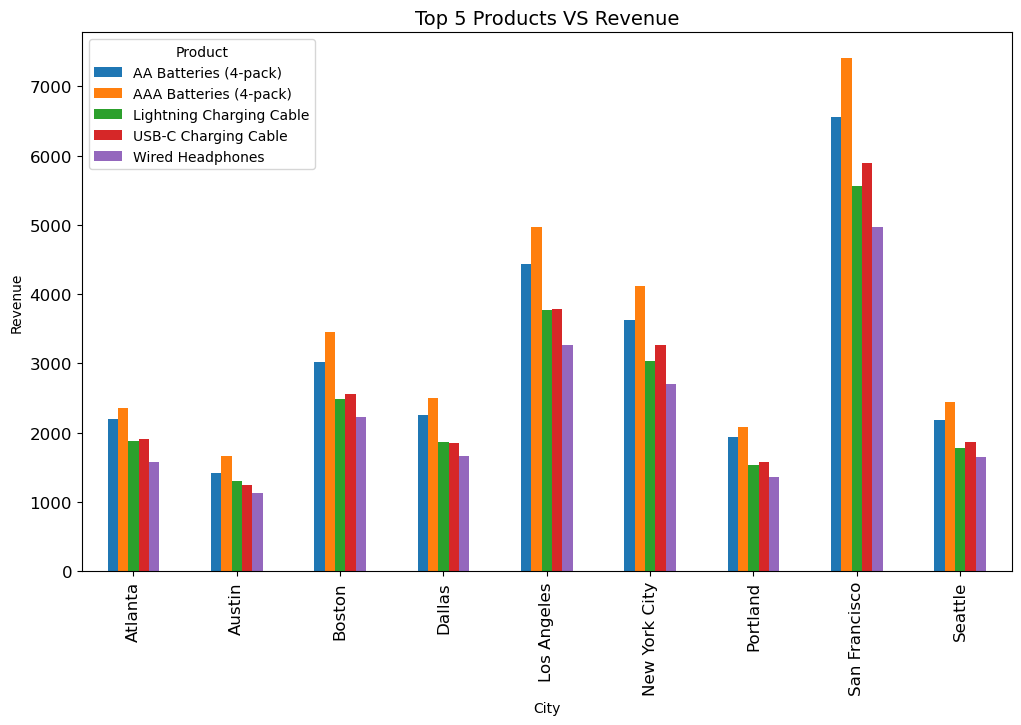

In [74]:
x.plot(kind = 'bar' , figsize=(12,7) , fontsize = 12)
plt.ylabel('Revenue')
plt.title("Top 5 Products VS Revenue" , fontsize = 14)

## What products are most often sold together ?

In [76]:
import collections
orders_dict = collections.defaultdict(int)

In [77]:
ndata = data
ndata.reset_index(inplace = True)

In [78]:
order = ndata.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

In [79]:
x = order.str.split(',')

In [80]:
def combination(orders , length):
  lst = []
  def resc(indx ,path):
    if len(path) == 2:
      lst.append(path)
      return
    if indx == length:
      return

    resc(indx+1 , [orders[indx]]+path)
    resc(indx+1 , path)

  resc(0 , [])
  return lst

In [81]:
for product in x:
  length =  len(product)
  if length == 2:
    orders_dict[tuple(sorted(product))]+=1
  elif length > 2:
    res = combination(product , length)
    for pair1 , pair2 in res:
      orders_dict[tuple(sorted([pair1 , pair2]))]+=1



In [82]:
most_common_items = sorted(orders_dict.items() , key = lambda x : x[1] , reverse = True)[:10]

for Orders,count in most_common_items:
  print(Orders,count)

('Product', 'Product') 22306425
('Lightning Charging Cable', 'iPhone') 2161
('Google Phone', 'USB-C Charging Cable') 2140
('Wired Headphones', 'iPhone') 1020
('Google Phone', 'Wired Headphones') 970
('Apple Airpods Headphones', 'iPhone') 825
('USB-C Charging Cable', 'Vareebadd Phone') 788
('USB-C Charging Cable', 'Wired Headphones') 547
('Bose SoundSport Headphones', 'Google Phone') 519
('Vareebadd Phone', 'Wired Headphones') 339


## What percentage of orders include multiple products (more than one item) ?


In [84]:
Products = data.groupby('Order ID')['Product'].count()
Products = Products.value_counts()
Products = Products.nlargest(3)

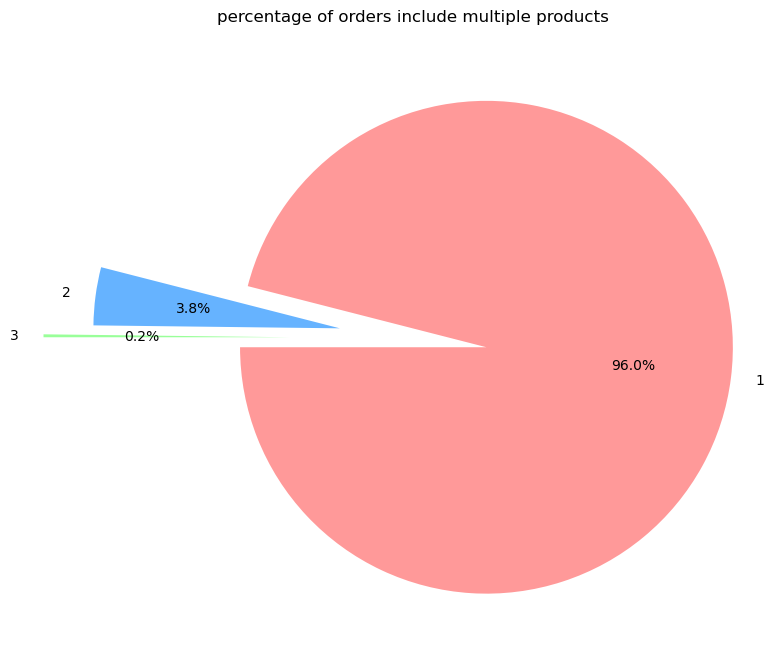

In [85]:
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = [0.3,0.3,0.5]
plt.figure(figsize=(8, 8))
plt.pie(Products, labels=Products.index, colors=colors, autopct='%1.1f%%', startangle=180,explode = explode)
plt.title("percentage of orders include multiple products")

plt.show()

## What was the highest single-order value?

In [87]:
data[data['Total'] == max(data['Total'])]

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Total,day,month,hour,Street Address,City,State,Zip
49917,109435,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,3400.0,Monday,April,12.0,731 11th St,New York City,NY,10001
53182,108933,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,3400.0,Saturday,April,21.0,668 Park St,San Francisco,CA,94016
61692,164980,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,3400.0,Monday,May,13.0,643 4th St,Boston,MA,02215
74863,66885,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,3400.0,Saturday,June,9.0,953 Ridge St,San Francisco,CA,94016


# City and Revenue Analysis:


## What city with Highest Revenue ?

In [90]:
Cities_orders = data.groupby(['City'] , as_index=False).agg({'Order ID' : 'count' ,
                                            'Total':'sum'
                                            })
Cities_orders.rename(columns = {'Order ID':'orders_count'},inplace = True)

In [91]:
Cities_orders

,City,orders_count,Total
0,Atlanta,14881,2795498.58
1,Austin,9905,1819581.75
2,Boston,19934,3661642.01
3,Dallas,14820,2767975.40
4,Los Angeles,29605,5452570.80
5,New York City,24876,4664317.43
6,Portland,12465,2320490.61
7,San Francisco,44732,8262203.91
8,Seattle,14732,2747755.48


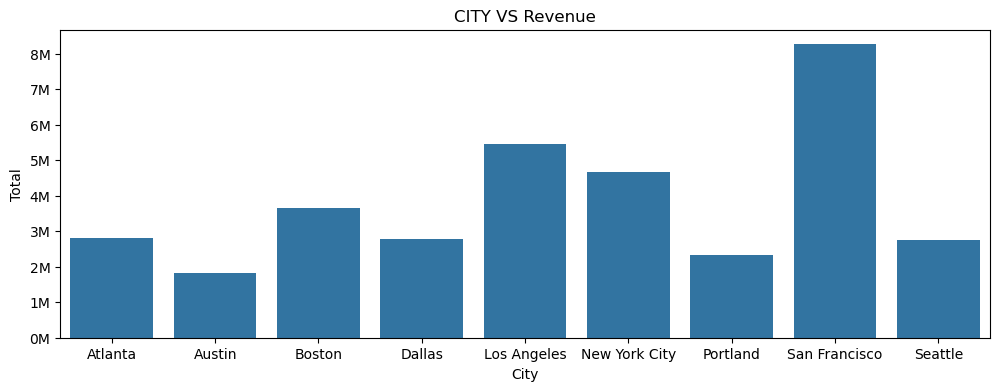

In [92]:
plt.figure(figsize=(12 , 4))
ax = sns.barplot(data = Cities_orders, x = 'City' , y = 'Total')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M'))
plt.title("CITY VS Revenue")
plt.show()

## What city sold the most products ?

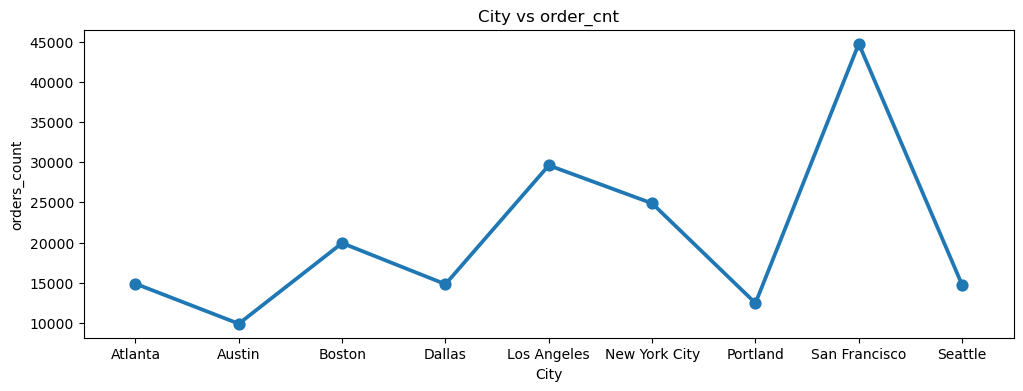

In [94]:
plt.figure(figsize=(12 , 4))
ax = sns.pointplot(data = Cities_orders, x = 'City' , y = 'orders_count')
plt.title("City vs order_cnt")
plt.show()

# State Analysis:


## What is the distribution of States?



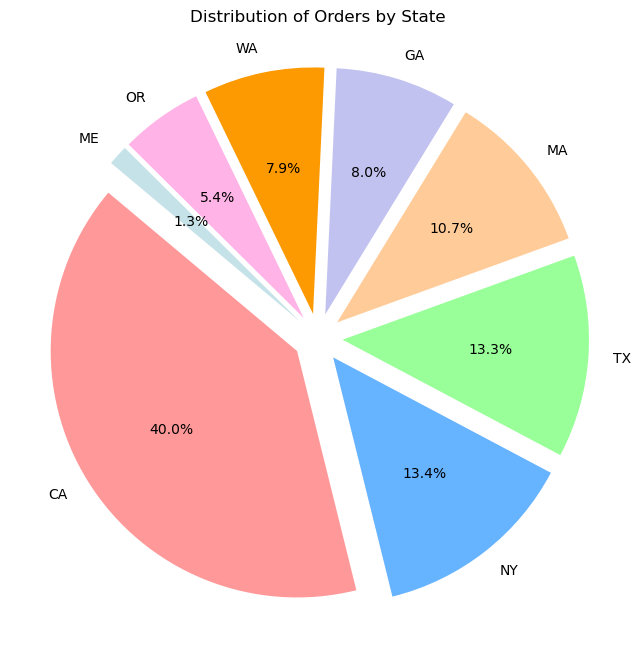

In [97]:
states = data['State'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0','#fd9901', '#ffb3e6', '#c6e2e9']
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(8, 8))
plt.pie(states, labels=states.index, colors=colors, autopct='%1.1f%%', startangle=140,explode = explode)
plt.title("Distribution of Orders by State")

plt.show()